In [1]:
import xarray as xr
import pandas as pd

# all Ocean variable names below
#avg_mlotst125  avg_siconc  avg_sisnthick  avg_sithick  avg_siue  avg_sivn  avg_sos  avg_tos  avg_zos

# Define the ocean variable name as a parameter
ocean_var = 'avg_zos'  # Example: avg_sos, you can change this to any other variable like 'avg_mlotst125'

# Construct the file path (here for Historical run) dynamically using the ocean_var parameter
file_path = f'/work/bm1344/wp6/d6.1/model-output/ifs-fesom2-sr/Phase1_FESOM/Hist/monthly/2d/{ocean_var}/{ocean_var}_*.nc'

# Open the multiple netcdf files using the dynamic file path
ds = xr.open_mfdataset(file_path)

# Inspect the updated dataset
ds


<xarray.Dataset>
Dimensions:    (time: 480, bnds: 2, lon: 1440, lat: 721, depth: 1)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-16 ... 1989-12-16
  * lon        (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat        (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
  * depth      (depth) float64 0.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
    avg_zos    (time, depth, lat, lon) float32 dask.array<chunksize=(12, 1, 721, 1440), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.4.0 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    frequency:    mon
    history:      Thu Nov 21 16:13:17 2024: cdo -z zstd -O -f nc4 monmean /tm...
    CDO:          Climate Data Operators version 2.4.0 (https://mpimet.mpg.de...

In [4]:
#lonflip
sst= ds['avg_zos']
ds.coords['lon'] = (ds.coords['lon'] + 180) % 360 - 180
ds = ds.sortby(ds.lon)
sst

<xarray.DataArray 'avg_zos' (time: 480, depth: 1, lat: 721, lon: 1440)>
dask.array<getitem, shape=(480, 1, 721, 1440), dtype=float32, chunksize=(12, 1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1950-01-16 1950-02-14T12:00:00 ... 1989-12-16
  * lon      (lon) float64 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
  * depth    (depth) float64 0.0
Attributes:
    standard_name:  sea_surface_height_above_geoid
    long_name:      Time-mean sea surface height
    units:          m
    param:          1.3.10
    cell_methods:   time: mean

In [5]:
sssm_yr=sssm.resample(time="1Y").mean()
sssm_yr
sssm_yr_mean=sssm_yr[21:40].mean('time')
sssm_yr_mean

<xarray.DataArray 'avg_zos' (depth: 1, lat: 721, lon: 1440)>
dask.array<mean_agg-aggregate, shape=(1, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
  * depth    (depth) float64 0.0

In [6]:
ds_mpi = xr.open_dataset('/work/bm1344/wp6/d6.1/model-output/icon-esm-er/icon-esm-er_erc2002_control_gr025_ssh_P1D.nc')

ds_mpi

<xarray.Dataset>
Dimensions:  (time: 7305, lon: 1440, lat: 721)
Coordinates:
  * time     (time) datetime64[ns] 1991-01-02 1991-01-03 ... 2011-01-01
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
Data variables:
    ssh      (time, lat, lon) float32 ...
Attributes:
    CDI:                       Climate Data Interface version 2.2.4 (https://...
    Conventions:               CF-1.6
    source:                    git@gitlab.dkrz.de:icon/icon-mpim.git@1ede179e...
    institution:               Max Planck Institute for Meteorology/Deutscher...
    title:                     ICON simulation
    history:                   Mon Oct 14 14:40:20 2024: cdo -P 12 -mergetime...
    references:                see MPIM/DWD publications
    comment:                   Sapphire Dyamond (k203123) on l40695 (Linux 4....
    cdo_openmp_thread_number:  12
    CDO:                       Climate Data Operators version 2.2.2 (https://...

In [9]:
#lonflip
ssh_mpi= ds_mpi['ssh']
ds_mpi.coords['lon'] = (ds_mpi.coords['lon'] + 180) % 360 - 180
ds_mpi = ds_mpi.sortby(ds_mpi.lon)
ssh_mpi

<xarray.DataArray 'ssh' (time: 7305, lat: 721, lon: 1440)>
[7584343200 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1991-01-02 1991-01-03 ... 2011-01-01
  * lon      (lon) float64 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
Attributes:
    standard_name:  ssh
    long_name:      surface elevation at cell center
    units:          m
    param:          1.3.10

In [10]:
ssh_mpi_mon=ssh_mpi.resample(time="1M").mean()
ssh_mpi_mon
ssh_mpi_yr=ssh_mpi_mon.resample(time="1Y").mean()
ssh_mpi_yr
ssh_mpi_yr_mean=ssh_mpi_yr.mean('time')
ssh_mpi_yr_mean

<xarray.DataArray 'ssh' (lat: 721, lon: 1440)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [-0.5760003 , -0.5759441 , -0.5758893 , ..., -0.57617694,
        -0.57611644, -0.5760576 ],
       [-0.5885775 , -0.58855927, -0.5885413 , ..., -0.58863246,
        -0.58861446, -0.58859587],
       [-0.59304667, -0.5930401 , -0.59303355, ..., -0.59306645,
        -0.5930598 , -0.59305316]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0

/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'vcenter'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


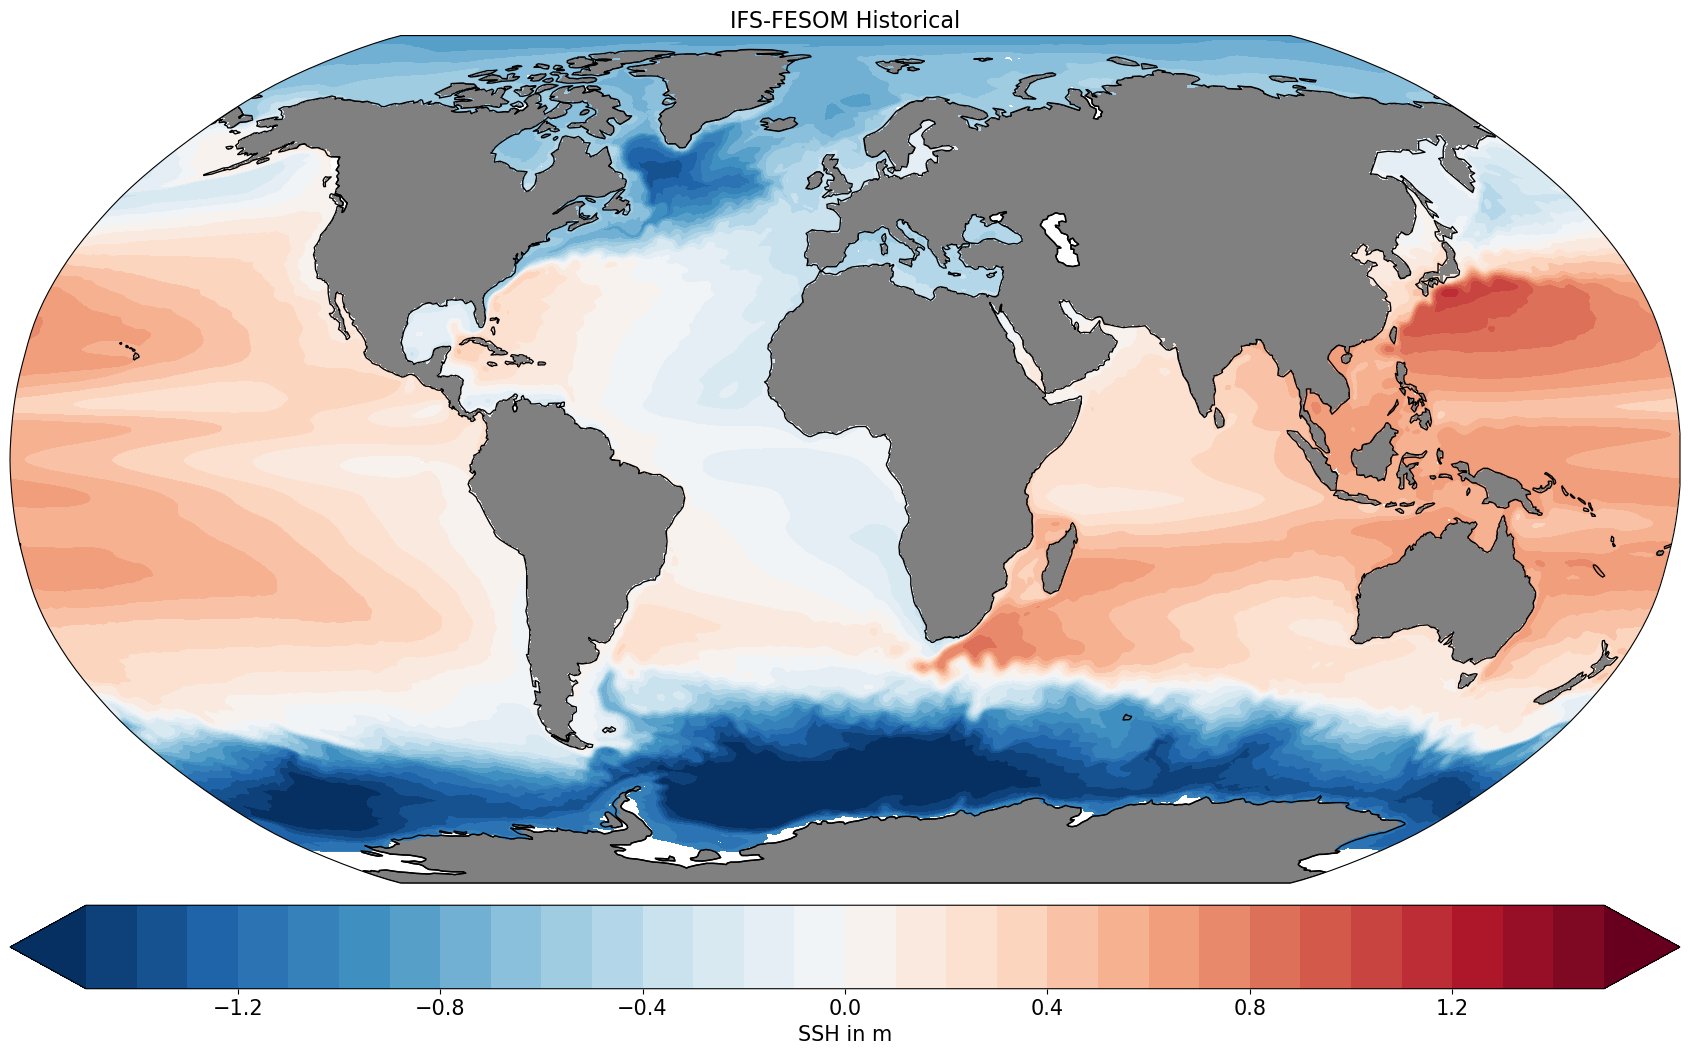

In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cmocean
import cmocean.cm as cmo
import cartopy.crs as ccrs
import cartopy as cart
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

fig = plt.figure(figsize=(17,15))


ax1 = fig.add_subplot(111,
                 projection=ccrs.Robinson())



p1=sssm_yr_mean[0,:,:].plot.contourf(ax=ax1, vmin=-1.5, vcenter=0, vmax=1.5,levels=31, extend='both', cmap='RdBu_r', add_colorbar=False, transform=ccrs.PlateCarree(), robust='true')

cb = plt.colorbar(p1, extend='both', orientation='horizontal', pad=0.015)
cb.set_label('SSH in m', fontsize=15)

# Adjust colorbar tick label font size
cb.ax.tick_params(labelsize=15)  # Set the desired font size


ax1.coastlines()
ax1.add_feature(cfeature.LAND, facecolor='gray', edgecolor='k')
ax1.set_title('IFS-FESOM Historical', fontsize=16)


plt.tight_layout()

plt.savefig("IFS-FESOM_SSH_Hist_mean20yr.png",bbox_inches='tight', dpi=300)



/tmp/ipykernel_1203017/628364134.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust rect to make room for colorbar


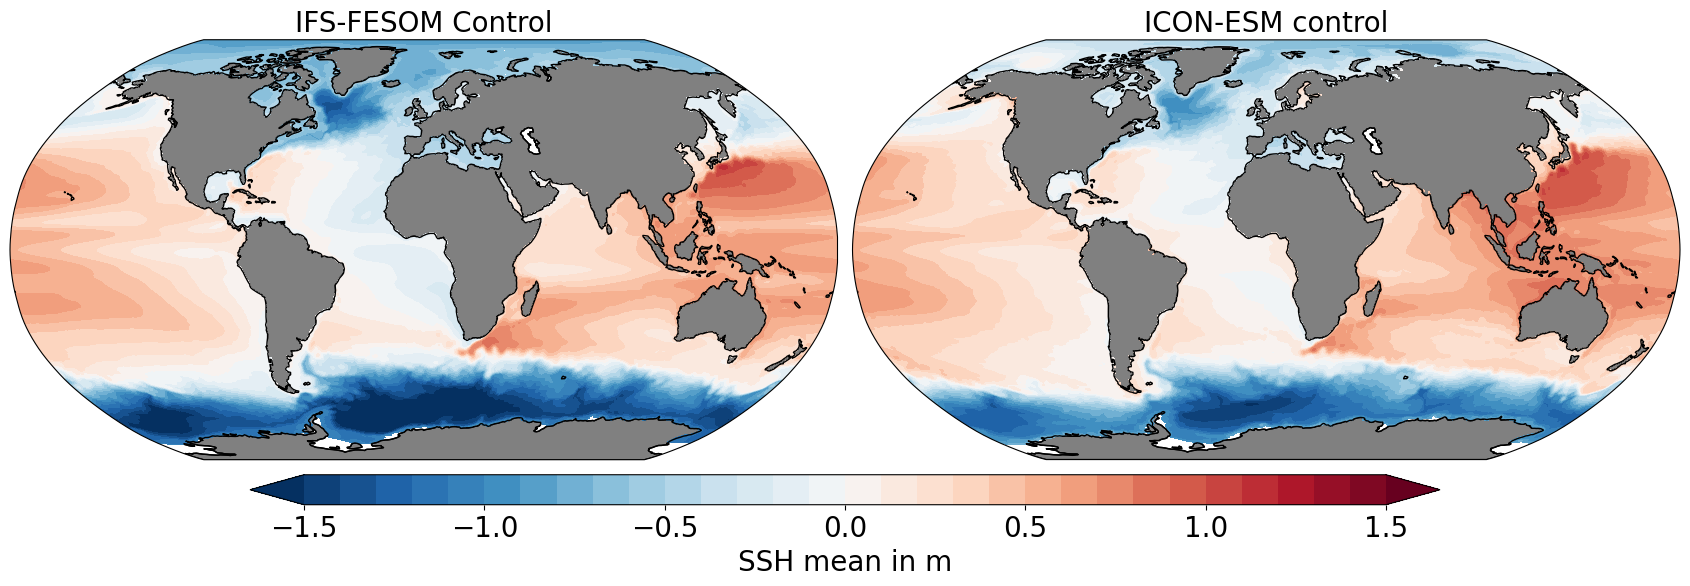

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo

# Create the figure
fig = plt.figure(figsize=(17, 15))

# First subplot
ax1 = fig.add_subplot(121, projection=ccrs.Robinson())
p1 = sssm_yr_mean[0,:,:].plot.contourf(ax=ax1, vmin=-1.5, vcenter=0, vmax=1.5, levels=31, extend='both', cmap='RdBu_r', add_colorbar=False, transform=ccrs.PlateCarree(), robust=True)
ax1.coastlines()
ax1.add_feature(cfeature.LAND, facecolor='gray', edgecolor='k')
ax1.set_title('IFS-FESOM Control', fontsize=20)

# Second subplot
ax2 = fig.add_subplot(122, projection=ccrs.Robinson())
p2 = ssh_mpi_yr_mean[:, :].plot.contourf(ax=ax2, vmin=-1.5, vcenter=0, vmax=1.5, levels=31, extend='both', cmap='RdBu_r', add_colorbar=False, transform=ccrs.PlateCarree(), robust=True)
ax2.coastlines()
ax2.add_feature(cfeature.LAND, facecolor='gray', edgecolor='k')
ax2.set_title('ICON-ESM control', fontsize=20)

# Add a common colorbar
cbar_ax = fig.add_axes([0.15, 0.38, 0.7, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(p1, cax=cbar_ax, extend='both', orientation='horizontal', ticks=[-1.5, -1.0, -0.5, 0, 0.5, 1.0, 1.5])
cbar.set_label('SSH mean in m', fontsize=20)
cbar.ax.tick_params(labelsize=20)  # Adjust colorbar tick label font size

# Adjust layout
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust rect to make room for colorbar
plt.savefig("FESOm_ICON_SSH_mean.png",bbox_inches='tight', dpi=400)
plt.show()

In [11]:
import intake

eerie_cat=intake.open_catalog("https://raw.githubusercontent.com/eerie-project/intake_catalogues/main/eerie.yaml")
eerie_cat

eerie:
  args:
    path: https://raw.githubusercontent.com/eerie-project/intake_catalogues/main/eerie.yaml
  description: ''
  driver: intake.catalog.local.YAMLFileCatalog
  metadata: {}


In [12]:
obs=eerie_cat['dkrz.disk.observations']['AVISO']['ssh-L4']['daily'].to_dask()
#print((obs))
obs

<xarray.Dataset>
Dimensions:         (time: 10766, latitude: 720, longitude: 1440, nv: 2)
Coordinates:
  * latitude        (latitude) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * longitude       (longitude) float32 -179.9 -179.6 -179.4 ... 179.6 179.9
  * nv              (nv) int32 0 1
  * time            (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2022-06-23
Data variables: (12/14)
    adt             (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    crs             (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    err_sla         (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    err_ugosa       (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    err_vgosa       (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    flag_ice        (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ...              ...
    sla             (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    tpa_correction  (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    ugos            (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ugosa           (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    vgos            (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    vgosa           (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         http://climate.copernicus.eu/c3s-user-se...
    creator_email:                   http://climate.copernicus.eu/c3s-user-se...
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               1993-01-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             1992-12-31T12:00:00Z
    title:                           DT merged two satellites Global Ocean Gr...

In [13]:
ssho=obs['adt'][:,:,:].sel(time=slice('1993-01-01', '2021-12-31'))
#ssh[0,:,:].plot()
ssho

<xarray.DataArray 'adt' (time: 10592, latitude: 720, longitude: 1440)>
dask.array<getitem, shape=(10592, 720, 1440), dtype=float64, chunksize=(1, 720, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2021-12-31
Attributes:
    comment:        The absolute dynamic topography is the sea surface height...
    grid_mapping:   crs
    long_name:      Absolute dynamic topography
    standard_name:  sea_surface_height_above_geoid
    units:          m

In [14]:
import numpy as np

ssh_mon=ssho.resample(time="1M").mean()
ssh_mon
ssh_yr=ssho.resample(time="1Y").mean()
ssh_yr
ssh_yr_mean=ssh_yr[:].mean('time')

weights = np.cos(np.deg2rad(ssh_yr_mean.latitude))
weights.name = "weights"
ssh_yr_mean_weighted = ssh_yr_mean.weighted(weights)
global_mean = ssh_yr_mean_weighted.mean(dim=("latitude", "longitude"))
#global_mean = ssh_yr_mean.mean()
ssh_yr_mean_anomaly = ssh_yr_mean - global_mean

ssh_yr_mean_anomaly

<xarray.DataArray 'adt' (latitude: 720, longitude: 1440)>
dask.array<sub, shape=(720, 1440), dtype=float64, chunksize=(720, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9

In [15]:
import numpy as np
import xarray as xr
import dask.array as da
from dask import delayed
from scipy.interpolate import NearestNDInterpolator

def interpolate_to_grid(data, target_lon=np.linspace(-180, 179.75, 1440), target_lat=np.linspace(-90, 90, 721)):
    """
    Generalized function to interpolate an xarray.DataArray onto a specified latitude-longitude grid.
    """
    # Check if input data has time dimension
    has_time_dim = 'time' in data.dims

    # Extract original lat/lon coordinates
    model_lon = data.longitude.values
    model_lat = data.latitude.values
    
    # Debugging shapes
    print("Longitude shape:", model_lon.shape)
    print("Latitude shape:", model_lat.shape)

    # Handle 1D lat/lon or 2D grids
    if model_lon.ndim == 1 and model_lat.ndim == 1:
        lon_grid, lat_grid = np.meshgrid(model_lon, model_lat)
    else:
        lon_grid, lat_grid = model_lon, model_lat
    
    # Filter NaNs
    valid_mask = ~((np.isnan(lon_grid)) | (np.isnan(lat_grid)))
    valid_lats = lat_grid[valid_mask]
    valid_lons = lon_grid[valid_mask]

    # Adjust longitude range
    valid_lons = np.where(valid_lons > 180, valid_lons - 360, valid_lons)
    points_ifs = np.vstack((valid_lons, valid_lats)).T

    # Create the target grid
    lon2, lat2 = np.meshgrid(target_lon, target_lat)

    # Define a function for delayed interpolation
    def interpolate_single_slice(data_sample):
        nn_interpolation = NearestNDInterpolator(points_ifs, data_sample)
        return nn_interpolation((lon2, lat2))

    # Interpolate based on time dimension presence
    if has_time_dim:
        interpolated_slices = [
            delayed(interpolate_single_slice)(data[i, :].values[valid_mask])
            for i in range(data.time.size)
        ]
        interpolated_data = da.stack(
            [da.from_delayed(item, shape=lon2.shape, dtype=np.float64)
             for item in interpolated_slices], axis=0
        )
        interpolated_da = xr.DataArray(
            interpolated_data,
            dims=("time", "lat", "lon"),
            coords={"time": data.time, "lat": target_lat, "lon": target_lon},
            name=f"{data.name}_interpolated"
        )
    else:
        interpolated_slice = delayed(interpolate_single_slice)(data.values[valid_mask])
        interpolated_data = da.from_delayed(interpolated_slice, shape=lon2.shape, dtype=np.float64)
        interpolated_da = xr.DataArray(
            interpolated_data,
            dims=("lat", "lon"),
            coords={"lat": target_lat, "lon": target_lon},
            name=f"{data.name}_interpolated"
        )

    return interpolated_da


In [16]:
ssh_yr_mean_anomaly_int = interpolate_to_grid(ssh_yr_mean_anomaly)
ssh_yr_mean_anomaly_int = ssh_yr_mean_anomaly_int.compute()  # Triggers computation if needed
ssh_yr_mean_anomaly_int

Longitude shape: (1440,)
Latitude shape: (720,)


<xarray.DataArray 'adt_interpolated' (lat: 721, lon: 1440)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8

/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'vcenter'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/tmp/ipykernel_1203017/3217930101.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust rect to make room for colorbar


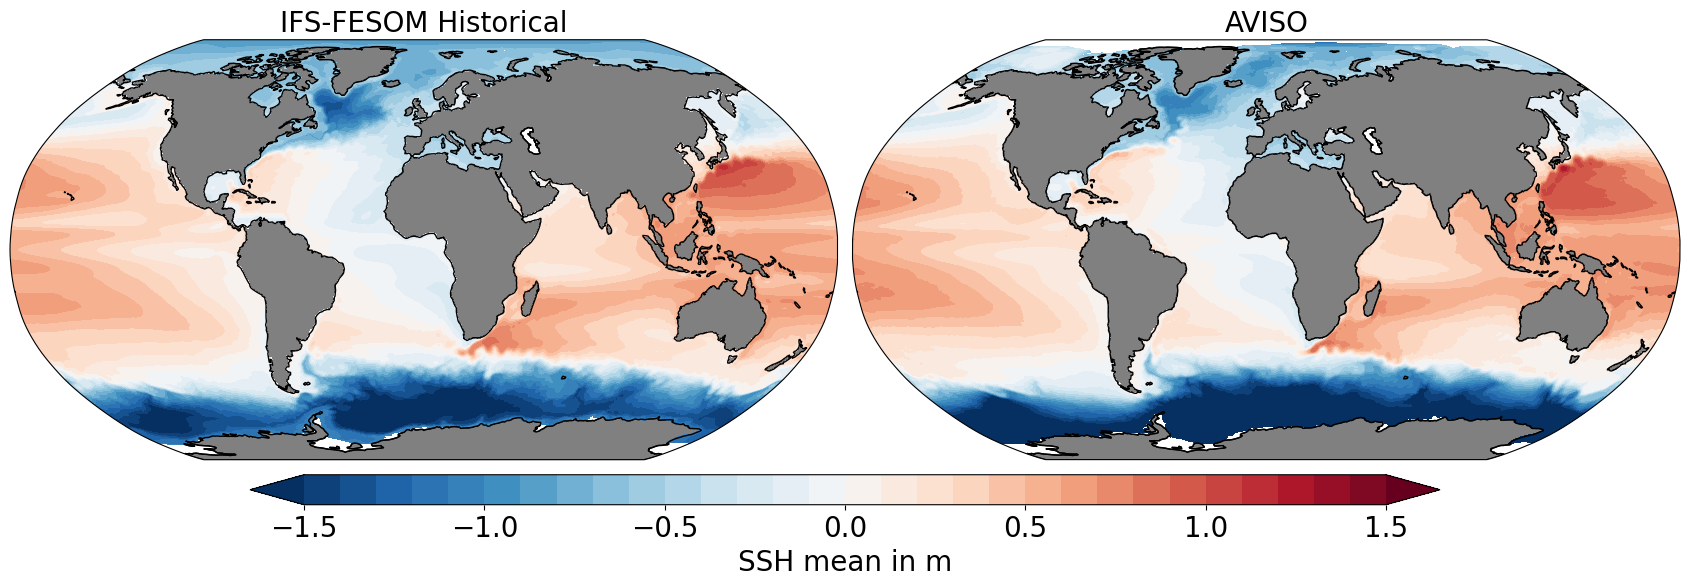

In [16]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo

# Create the figure
fig = plt.figure(figsize=(17, 15))

# First subplot
ax1 = fig.add_subplot(121, projection=ccrs.Robinson())
p1 = sssm_yr_mean[0,:,:].plot.contourf(ax=ax1, vmin=-1.5, vcenter=0, vmax=1.5, levels=31, extend='both', cmap='RdBu_r', add_colorbar=False, transform=ccrs.PlateCarree(), robust=True)
ax1.coastlines()
ax1.add_feature(cfeature.LAND, facecolor='gray', edgecolor='k')
ax1.set_title('IFS-FESOM Historical', fontsize=20)

# Second subplot
ax2 = fig.add_subplot(122, projection=ccrs.Robinson())
p2 = ssh_yr_mean_anomaly[:, :].plot.contourf(ax=ax2, vmin=-1.5, vcenter=0, vmax=1.5, levels=31, extend='both', cmap='RdBu_r', add_colorbar=False, transform=ccrs.PlateCarree(), robust=True)
ax2.coastlines()
ax2.add_feature(cfeature.LAND, facecolor='gray', edgecolor='k')
ax2.set_title('AVISO', fontsize=20)

# Add a common colorbar
cbar_ax = fig.add_axes([0.15, 0.38, 0.7, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(p1, cax=cbar_ax, extend='both', orientation='horizontal', ticks=[-1.5, -1.0, -0.5, 0, 0.5, 1.0, 1.5])
cbar.set_label('SSH mean in m', fontsize=20)
cbar.ax.tick_params(labelsize=20)  # Adjust colorbar tick label font size

# Adjust layout
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust rect to make room for colorbar
plt.savefig("FESOm_AVISO_SSH_mean.png",bbox_inches='tight', dpi=400)
plt.show()

/tmp/ipykernel_1203017/1853014347.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust rect to make room for colorbar


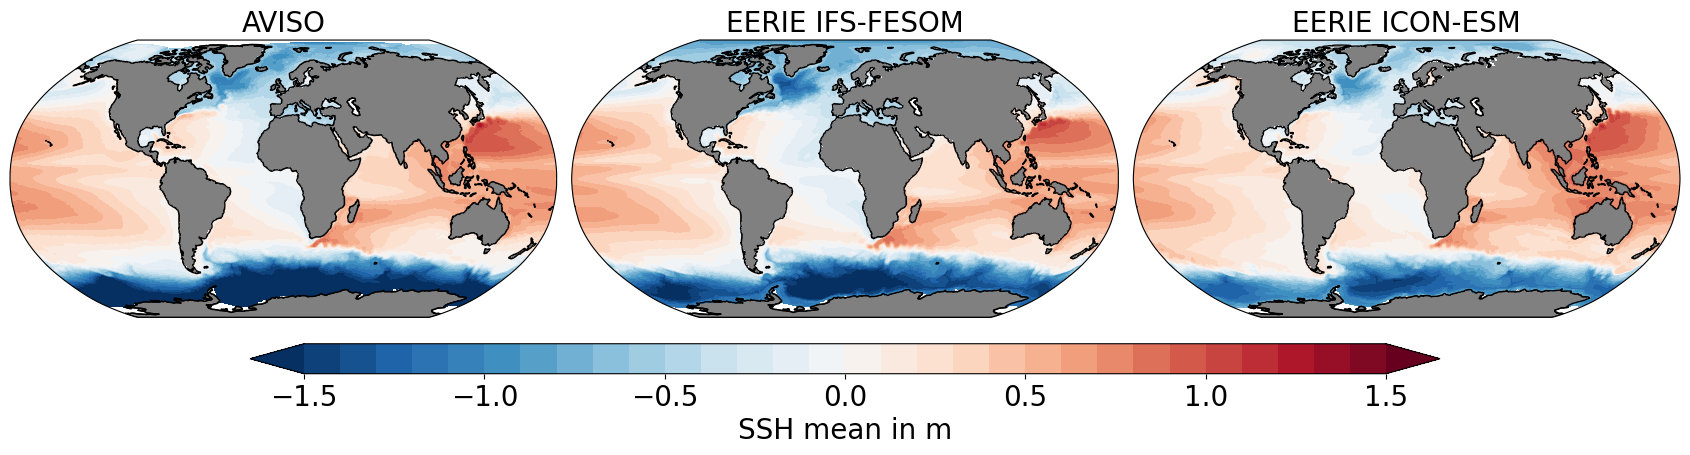

In [17]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo

# Create the figure
fig = plt.figure(figsize=(17, 15))

# First subplot
ax1 = fig.add_subplot(131, projection=ccrs.Robinson())
p1 = ssh_yr_mean_anomaly[:, :].plot.contourf(ax=ax1, vmin=-1.5, vcenter=0, vmax=1.5, levels=31, extend='both', cmap='RdBu_r', add_colorbar=False, transform=ccrs.PlateCarree(), robust=True)
ax1.coastlines()
ax1.add_feature(cfeature.LAND, facecolor='gray', edgecolor='k')
ax1.set_title('AVISO', fontsize=20)

# Second subplot
ax2 = fig.add_subplot(132, projection=ccrs.Robinson())
p2 = sssm_yr_mean[0,:,:].plot.contourf(ax=ax2, vmin=-1.5, vcenter=0, vmax=1.5, levels=31, extend='both', cmap='RdBu_r', add_colorbar=False, transform=ccrs.PlateCarree(), robust=True)
ax2.coastlines()
ax2.add_feature(cfeature.LAND, facecolor='gray', edgecolor='k')
ax2.set_title('EERIE IFS-FESOM', fontsize=20)

# Third subplot
ax3 = fig.add_subplot(133, projection=ccrs.Robinson())
p3 = ssh_mpi_yr_mean[:, :].plot.contourf(ax=ax3, vmin=-1.5, vcenter=0, vmax=1.5, levels=31, extend='both', cmap='RdBu_r', add_colorbar=False, transform=ccrs.PlateCarree(), robust=True)
ax3.coastlines()
ax3.add_feature(cfeature.LAND, facecolor='gray', edgecolor='k')
ax3.set_title('EERIE ICON-ESM', fontsize=20)

# Add a common colorbar
cbar_ax = fig.add_axes([0.15, 0.42, 0.7, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(p1, cax=cbar_ax, extend='both', orientation='horizontal', ticks=[-1.5, -1.0, -0.5, 0, 0.5, 1.0, 1.5])
cbar.set_label('SSH mean in m', fontsize=20)
cbar.ax.tick_params(labelsize=20)  # Adjust colorbar tick label font size

# Adjust layout
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust rect to make room for colorbar
plt.savefig("FESOm_ICON_SSH_mean.png",bbox_inches='tight', dpi=400)
plt.show()

In [17]:
ds_met_high = xr.open_dataset('/work/bm1344/a270228/metoffice/zos_nemo_N640-ORCA12_1m_2031-2050_grid-025.nc')
ds_met_high

ds_met_med = xr.open_dataset('/work/bm1344/a270228/metoffice/zos_nemo_N216-ORCA025_1m_2041-2060_grid-025.nc')
ds_met_med

<xarray.Dataset>
Dimensions:    (time: 240, bnds: 2, lon: 1440, lat: 721)
Coordinates:
  * time       (time) datetime64[ns] 2041-01-16T12:00:00 ... 2060-12-16T12:00:00
  * lon        (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat        (lat) float32 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lon_bnds   (lon, bnds) float32 ...
    lat_bnds   (lat, bnds) float32 ...
    zos        (time, lat, lon) float32 ...
Attributes: (12/23)
    CDI:            Climate Data Interface version 2.4.0 (https://mpimet.mpg....
    Conventions:    CF-1.6
    name:           cy021o_1m_18501201_18501231_grid_T
    description:    ocean T grid variables
    title:          ocean T grid variables
    timeStamp:      2023-Jun-29 18:12:36 GMT
    ...             ...
    variable_id:    area: area
    mo_runid:       u-cy021_N216e_eORCA025
    source_id:      HadGEM3-GC5-EERIE-N216-ORCA025
    NCO:            netCDF Operators version 4.7.5 (Homepage = http://nco.sf....
    history:        Mon Oct 28 11:34:16 2024: cdo seldate,2041-01-16,2060-12-...
    CDO:            Climate Data Operators version 2.4.0 (https://mpimet.mpg....

In [20]:
#lonflip
ssh_met= ds_met_high['zos']
ds_met_high.coords['lon'] = (ds_met_high.coords['lon'] + 180) % 360 - 180
ds_met_high = ds_met_high.sortby(ds.lon)
ssh_met


<xarray.DataArray 'zos' (time: 240, lat: 721, lon: 1440)>
[249177600 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2031-01-16T12:00:00 ... 2050-12-16T12:00:00
  * lon      (lon) float32 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * lat      (lat) float32 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
Attributes:
    standard_name:  dynamic_sea_surface_height_above_geoid
    long_name:      dynamic sea surface height
    units:          m
    cell_methods:   time: mean (interval: 450 s)
    cell_measures:  area: area

In [21]:
ssh_met_yr=ssh_met.resample(time="1Y").mean()
ssh_met_yr
ssh_met_yr_mean=ssh_met_yr[0:20].mean('time')
ssh_met_yr_mean

<xarray.DataArray 'zos' (lat: 721, lon: 1440)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [-0.5638107 , -0.56378996, -0.56376964, ..., -0.5638737 ,
        -0.5638524 , -0.5638315 ],
       [-0.56768256, -0.5676693 , -0.56765616, ..., -0.5677226 ,
        -0.5677092 , -0.5676959 ],
       [-0.5718082 , -0.5718082 , -0.5718082 , ..., -0.5718082 ,
        -0.5718082 , -0.5718082 ]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * lat      (lat) float32 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0

In [23]:
#lonflip
sshm_met= ds_met_med['zos']
ds_met_med.coords['lon'] = (ds_met_med.coords['lon'] + 180) % 360 - 180
ds_met_med = ds_met_med.sortby(ds_met_med.lon)
sshm_met


<xarray.DataArray 'zos' (time: 240, lat: 721, lon: 1440)>
[249177600 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2041-01-16T12:00:00 ... 2060-12-16T12:00:00
  * lon      (lon) float32 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * lat      (lat) float32 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
Attributes:
    standard_name:  dynamic_sea_surface_height_above_geoid
    long_name:      dynamic sea surface height
    units:          m
    cell_methods:   time: mean (interval: 1800 s)
    cell_measures:  area: area

In [24]:
sshm_met_yr=sshm_met.resample(time="1Y").mean()
sshm_met_yr
sshm_met_yr_mean=sshm_met_yr[0:20].mean('time')
sshm_met_yr_mean

<xarray.DataArray 'zos' (lat: 721, lon: 1440)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [-0.58377755, -0.58375114, -0.58372486, ..., -0.5838572 ,
        -0.58383054, -0.583804  ],
       [-0.58665246, -0.5866384 , -0.5866244 , ..., -0.5866951 ,
        -0.58668077, -0.5866667 ],
       [-0.5897344 , -0.5897344 , -0.5897344 , ..., -0.5897344 ,
        -0.5897344 , -0.5897344 ]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * lat      (lat) float32 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0

/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'vcenter'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


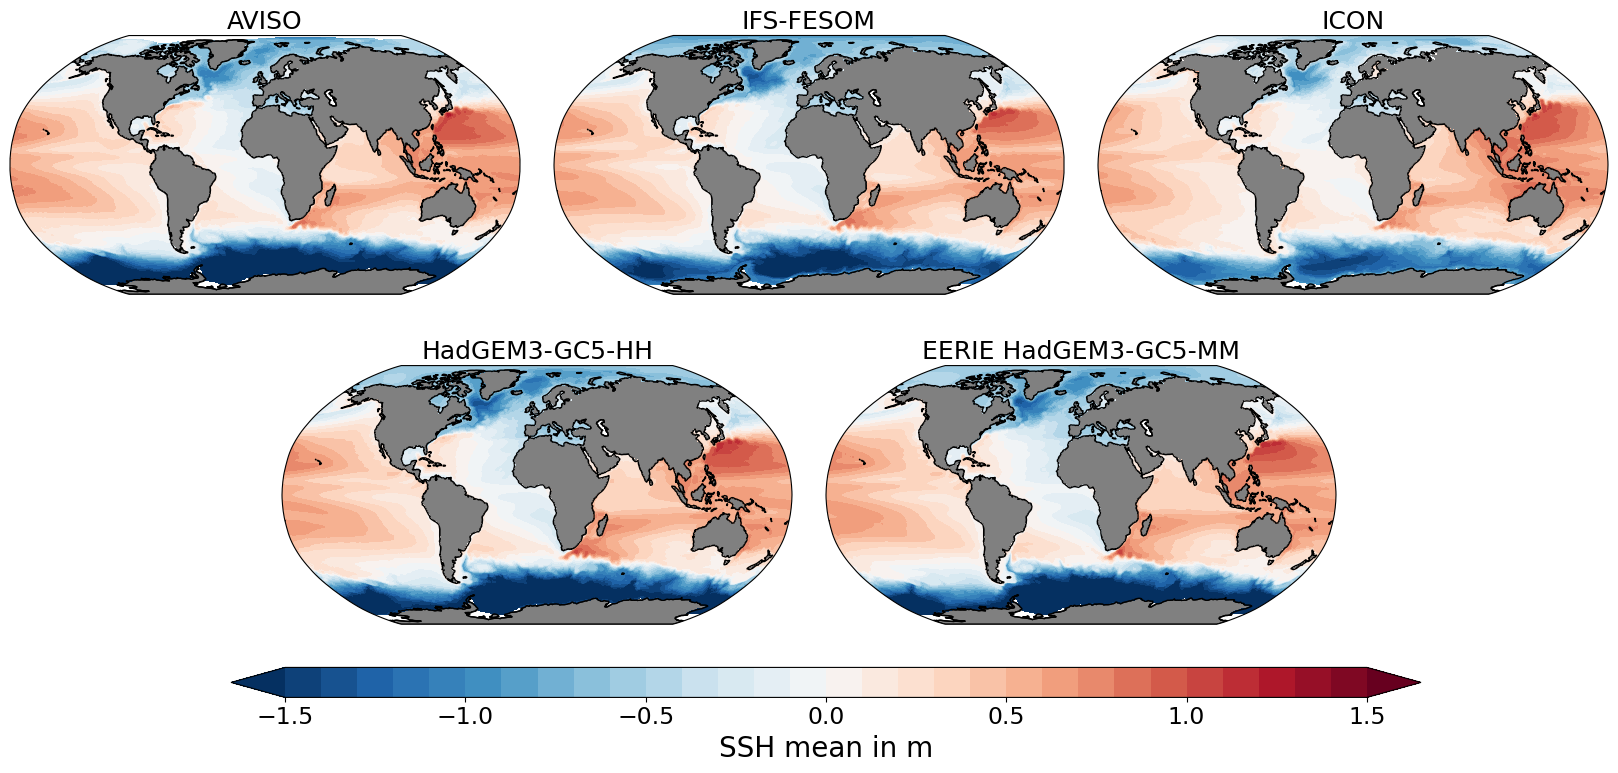

In [23]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo

# Create the figure
fig = plt.figure(figsize=(17, 15))

# Define the positions for subplots (adjusted to be closer together)
positions = [
    [0.02, 0.53, 0.3, 0.45],  # [left, bottom, width, height]
    [0.34, 0.53, 0.3, 0.45],
    [0.66, 0.53, 0.3, 0.45],
    [0.18, 0.31, 0.3, 0.45],
    [0.5, 0.31, 0.3, 0.45]
]

# Create subplots
axes = []
for pos in positions:
    ax = fig.add_axes(pos, projection=ccrs.Robinson())
    axes.append(ax)

# Plot data and set titles
plot_data = [
    (ssh_yr_mean_anomaly[:, :], 'AVISO'),
    (sssm_yr_mean[0,:,:], 'IFS-FESOM'),
    (ssh_mpi_yr_mean[:, :], 'ICON'),
    (ssh_met_yr_mean[:, :], 'HadGEM3-GC5-HH'),
    (sshm_met_yr_mean[:, :], 'EERIE HadGEM3-GC5-MM')
]

for ax, (data, title) in zip(axes, plot_data):
    p = data.plot.contourf(ax=ax, vmin=-1.5, vcenter=0, vmax=1.5, levels=31, 
                           extend='both', cmap='RdBu_r', add_colorbar=False, 
                           transform=ccrs.PlateCarree(), robust=True)
    ax.coastlines()
    ax.add_feature(cfeature.LAND, facecolor='gray', edgecolor='k')
    ax.set_title(title, fontsize=18, pad=5)  # Reduced padding for title

# Add a common colorbar (moved closer to the plots)
#cbar_ax = fig.add_axes([0.25, 0.2, 0.5, 0.02])  # [left, bottom, width, height]
cbar_ax = fig.add_axes([0.15, 0.40, 0.7, 0.02])  # Adjust [left, bottom, width, height]

cbar = fig.colorbar(p, cax=cbar_ax, extend='both', orientation='horizontal', 
                    ticks=[-1.5, -1.0, -0.5, 0, 0.5, 1.0, 1.5])
cbar.set_label('SSH mean in m', fontsize=20, labelpad=5)  # Reduced label padding
cbar.ax.tick_params(labelsize=17, pad=2)  # Reduced tick padding

plt.savefig("HadGEM_FESOM_ICON_AVISO_SSH_mean.png", bbox_inches='tight', dpi=400)
plt.show()

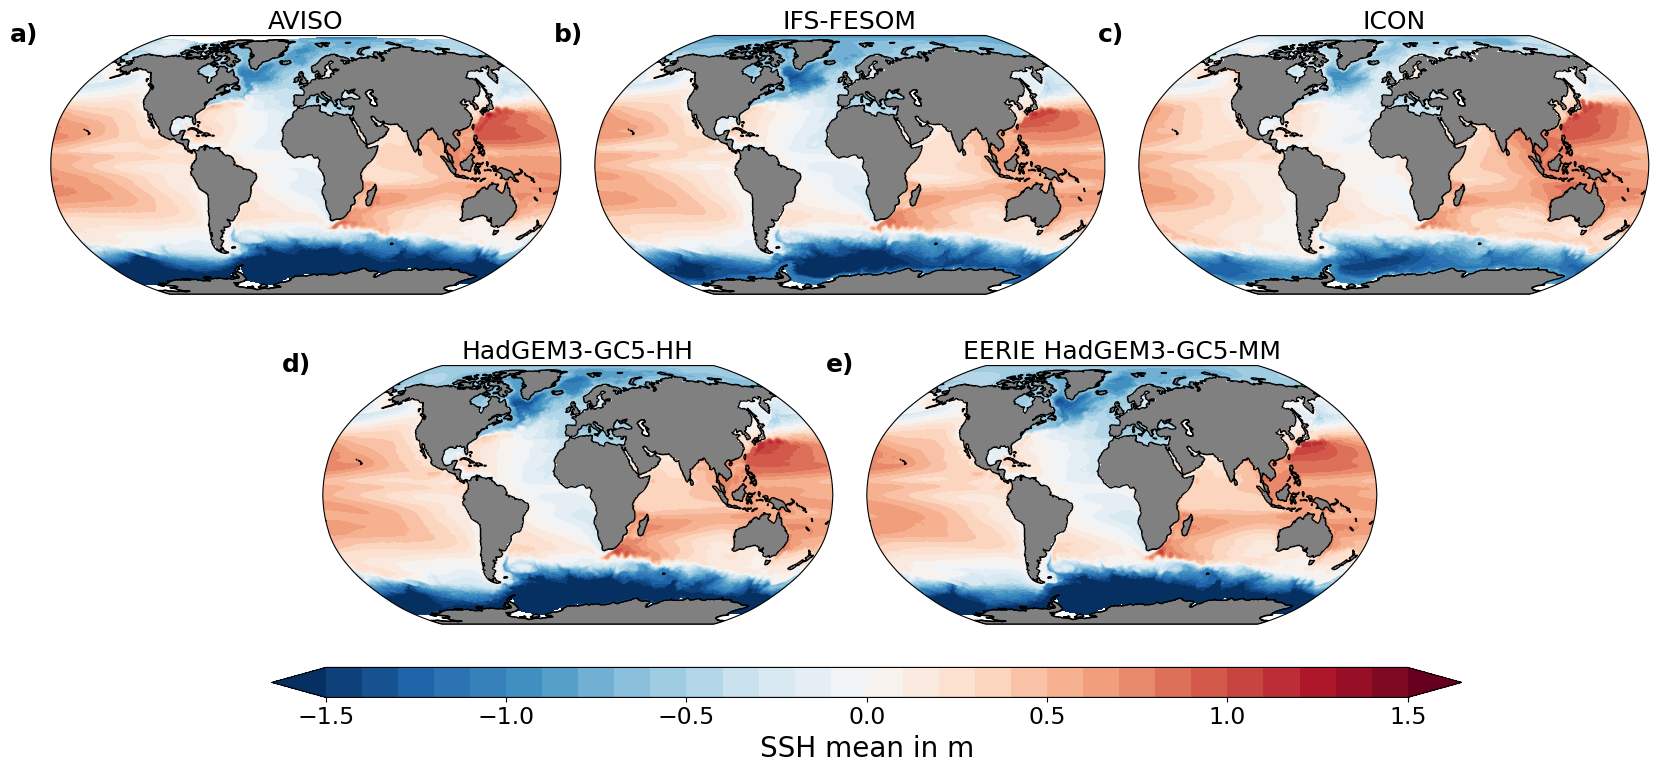

In [26]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo

# Create the figure
fig = plt.figure(figsize=(17, 15))

# Define the positions for subplots (adjusted to be closer together)
positions = [
    [0.02, 0.53, 0.3, 0.45],  # [left, bottom, width, height]
    [0.34, 0.53, 0.3, 0.45],
    [0.66, 0.53, 0.3, 0.45],
    [0.18, 0.31, 0.3, 0.45],
    [0.5, 0.31, 0.3, 0.45]
]

# Create subplots
axes = []
for pos in positions:
    ax = fig.add_axes(pos, projection=ccrs.Robinson())
    axes.append(ax)

# Plot data and set titles
plot_data = [
    (ssh_yr_mean_anomaly[:, :], 'AVISO'),
    (sssm_yr_mean[0, :, :], 'IFS-FESOM'),
    (ssh_mpi_yr_mean[:, :], 'ICON'),
    (ssh_met_yr_mean[:, :], 'HadGEM3-GC5-HH'),
    (sshm_met_yr_mean[:, :], 'EERIE HadGEM3-GC5-MM')
]

# Define subplot labels
labels = ['a)', 'b)', 'c)', 'd)', 'e)']

for ax, (data, title), label in zip(axes, plot_data, labels):
    p = data.plot.contourf(
        ax=ax, vmin=-1.5, vcenter=0, vmax=1.5, levels=31, 
        extend='both', cmap='RdBu_r', add_colorbar=False, 
        transform=ccrs.PlateCarree(), robust=True
    )
    ax.coastlines()
    ax.add_feature(cfeature.LAND, facecolor='gray', edgecolor='k')
    ax.set_title(title, fontsize=18, pad=5)  # Reduced padding for title
    # Add subplot label
    ax.text(-0.08, 1.05, label, transform=ax.transAxes, fontsize=18, fontweight='bold', va='top', ha='left')

# Add a common colorbar (moved closer to the plots)
cbar_ax = fig.add_axes([0.15, 0.40, 0.7, 0.02])  # Adjust [left, bottom, width, height]

cbar = fig.colorbar(
    p, cax=cbar_ax, extend='both', orientation='horizontal', 
    ticks=[-1.5, -1.0, -0.5, 0, 0.5, 1.0, 1.5]
)
cbar.set_label('SSH mean in m', fontsize=20, labelpad=5)  # Reduced label padding
cbar.ax.tick_params(labelsize=17, pad=2)  # Reduced tick padding

plt.savefig("HadGEM_FESOM_ICON_AVISO_SSH_mean.png", bbox_inches='tight', dpi=400)
plt.show()


In [25]:
ssh_fesom_bias = sssm_yr_mean[0,:,:] - ssh_yr_mean_anomaly_int[:, :]
ssh_mpi_bias = ssh_mpi_yr_mean[:, :] - ssh_yr_mean_anomaly_int[:, :]
ssh_met_bias = ssh_met_yr_mean[:, :] - ssh_yr_mean_anomaly_int[:, :]
sshm_met_bias = sshm_met_yr_mean[:, :] - ssh_yr_mean_anomaly_int[:, :]

ssh_fesom_bias

<xarray.DataArray (lat: 721, lon: 1440)>
dask.array<sub, shape=(721, 1440), dtype=float64, chunksize=(721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
    depth    float64 0.0

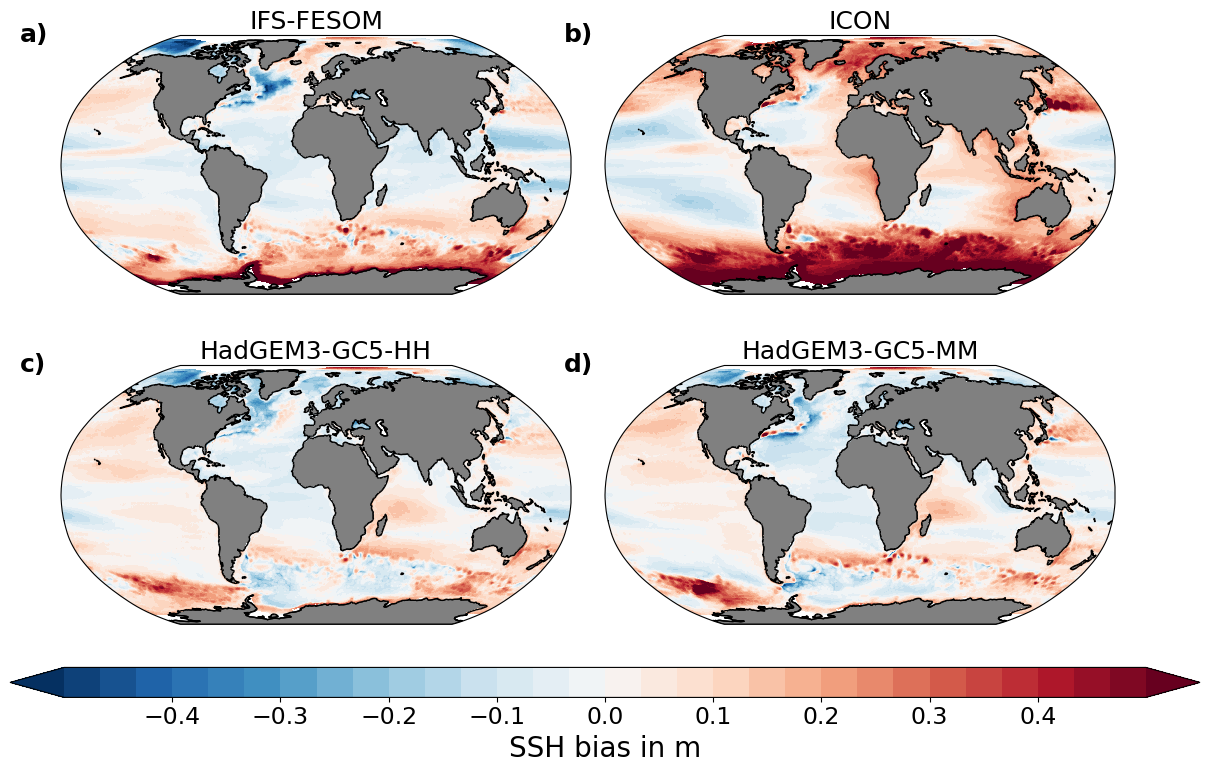

In [27]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo

# Create the figure
fig = plt.figure(figsize=(17, 15))

# Define the positions for subplots (adjusted to be closer together)
positions = [
    [0.18, 0.53, 0.3, 0.45],
    [0.5, 0.53, 0.3, 0.45],
    [0.18, 0.31, 0.3, 0.45],
    [0.5, 0.31, 0.3, 0.45]
]

# Create subplots
axes = []
for pos in positions:
    ax = fig.add_axes(pos, projection=ccrs.Robinson())
    axes.append(ax)

# Plot data and set titles
plot_data = [
    (ssh_fesom_bias[:,:], 'IFS-FESOM'),
    (ssh_mpi_bias[:,:], 'ICON'),
    (ssh_met_bias[:,:], 'HadGEM3-GC5-HH'),
    (sshm_met_bias[:,:], 'HadGEM3-GC5-MM')
]

# Define subplot labels
labels = ['a)', 'b)', 'c)', 'd)']

for ax, (data, title), label in zip(axes, plot_data, labels):
    p = data.plot.contourf(ax=ax, vmin=-0.5, vcenter=0, vmax=0.5, levels=31, 
                           extend='both', cmap='RdBu_r', add_colorbar=False, 
                           transform=ccrs.PlateCarree(), robust=True)
    ax.coastlines()
    ax.add_feature(cfeature.LAND, facecolor='gray', edgecolor='k')
    ax.set_title(title, fontsize=18, pad=5)  # Reduced padding for title
    ax.text(-0.08, 1.05, label, transform=ax.transAxes, fontsize=18, fontweight='bold', va='top', ha='left')
# Add a common colorbar (moved closer to the plots)
#cbar_ax = fig.add_axes([0.25, 0.2, 0.5, 0.02])  # [left, bottom, width, height]
cbar_ax = fig.add_axes([0.15, 0.40, 0.7, 0.02])  # Adjust [left, bottom, width, height]

cbar = fig.colorbar(p, cax=cbar_ax, extend='both', orientation='horizontal', ticks=[-0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4])
cbar.set_label('SSH bias in m', fontsize=20, labelpad=5)  # Reduced label padding
cbar.ax.tick_params(labelsize=17, pad=2)  # Reduced tick padding

plt.savefig("HadGEM_FESOM_ICON_AVISO_SSH_bias.png", bbox_inches='tight', dpi=400)
plt.show()